# Data Cleaning for Anytime Fitness Churn Dataset
This notebook outlines the data cleaning process for our Anytime Fitness churn dataset. 
It includes steps such as:
1. Libraries import and data loading
2. Initial data inspection
3. Handling missing values
4. De-duplication
5. Data type checks and conversions
6. Outlier detection and handling
7. Final data check and summary

**Author:** Raphael Lawrence Macadaeg 
**Date:** 2025-01-04


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display plots inline
%matplotlib inline


In [3]:
df = pd.read_csv('gym_churn_us.csv')

Optional: set pandas options for better display

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Initial Inspection

In [10]:
# View basic info
df.head()

# Check rows and columns count
print("Data shape (rows, columns):", df.shape)

# Quick overview of columns and data types
df.info()

# Describe numeric columns
df.describe()

Data shape (rows, columns): (4000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequen

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Check For Missing Values

In [12]:
missing_count = df.isnull().sum()
missing_percent = df.isnull().mean() * 100
missing_df = pd.DataFrame({'MissingCount': missing_count, 'MissingPercent': missing_percent})
missing_df

,MissingCount,MissingPercent
gender,0,0.0
Near_Location,0,0.0
Partner,0,0.0
Promo_friends,0,0.0
Phone,0,0.0
Contract_period,0,0.0
Group_visits,0,0.0
Age,0,0.0
Avg_additional_charges_total,0,0.0
Month_to_end_contract,0,0.0


**No Missing Values** - There will be no need to impute or drop missing data

## Check for and Remove Duplicates

In [14]:
before_dedup = df.shape[0]
df.drop_duplicates(inplace=True)
after_dedup = df.shape[0]

print(f"Number of rows before removing duplicates: {before_dedup}")
print(f"Number of rows after removing duplicates: {after_dedup}")
print(f"Duplicates removed: {before_dedup - after_dedup}")

Number of rows before removing duplicates: 4000
Number of rows after removing duplicates: 4000
Duplicates removed: 0


# Data Type Checks and Conversions

In [16]:
df.dtypes

gender                                 int64
Near_Location                          int64
Partner                                int64
Promo_friends                          int64
Phone                                  int64
Contract_period                        int64
Group_visits                           int64
Age                                    int64
Avg_additional_charges_total         float64
Month_to_end_contract                float64
Lifetime                               int64
Avg_class_frequency_total            float64
Avg_class_frequency_current_month    float64
Churn                                  int64
dtype: object

## Converting [gender] format 

In [18]:
df['gender'] = df['gender'].replace({1: 'Male', 0: 'Female'})

# Verify the conversion
print(df['gender'].unique())

['Male' 'Female']


## Converting [Months_to_end_contract] format to int

In [20]:
# Convert 'Months_to_end_contract' column to int
df['Month_to_end_contract'] = df['Month_to_end_contract'].astype(int)

# Verify the data type change
df['Month_to_end_contract'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4000 entries, 0 to 3999
Series name: Month_to_end_contract
Non-Null Count  Dtype
--------------  -----
4000 non-null   int32
dtypes: int32(1)
memory usage: 15.8 KB


In [19]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,Male,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,Female,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,Female,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,Female,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,Male,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


Using plain text labels instead of numeric codes for gender (e.g., “Male” and “Female” instead of 1 and 0) improves interpretability, collaboration, and clarity, making the dataset more user-friendly while still supporting any downstream modeling needs.

## Renaming Headers

In [22]:
df.rename(columns={
    'Churn': 'IsChurned',
    'gender': 'Gender',
    'Near_Location': 'IsLocal',
    'Partner': 'IsPartnerEmployee',
    'Promo_friends': 'IsFriendPromo',
    'Phone': 'HasPhone',
    'Age': 'MemberAge',
    'Lifetime': 'Tenure',
    "Contract_period": "ContractType",
    "Group_visits": "IsVisitingGroup",
    "Avg_additional_charges_total": "AvgOverdueCosts",
    "Month_to_end_contract": "NumMonthsContractEnd",
    "Avg_class_frequency_total": "OvrClassFreq",
    "Avg_class_frequency_current_month": "AvgClassFreqCurrentMonth"

}, inplace=True)

# Verify changes
df.head()

,Gender,IsLocal,IsPartnerEmployee,IsFriendPromo,HasPhone,ContractType,IsVisitingGroup,MemberAge,AvgOverdueCosts,NumMonthsContractEnd,Tenure,OvrClassFreq,AvgClassFreqCurrentMonth,IsChurned
0,Male,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,Female,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,Female,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,Female,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,Male,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


`Churn` → `IsChurned`

`gender` → `Gender`

`Near_Location` → `IsLocal`

`Partner` → `IsPartnerEmployee`

`Promo_friends` → `IsFriendPromo`

`Phone` → `HasPhone`

`Age` → `MemberAge`

`Lifetime` → `Tenure`

`Contract_period` → `ContractType`

`Group_visits` → `IsVisitingGroup`

`Avg_additional_charges_total` → `AvgOverdueCosts`

`Month_to_end_contract` → `NumMonthsContractEnd`

`Avg_class_frequency_total` → `OvrClassFreq`

`Avg_class_frequency_current_month` → `AvgClassFreqCurrentMonth`




**Renaming column headers with clear, descriptive terms is essential for Exploratory Data Analysis (EDA)** because:

1. **Immediate Clarity**  
   - Instead of having to remember or look up what “Churn” or “Partner” means, names like `IsChurned` or `IsPartnerEmployee` instantly convey their meaning.  
   - This clarity reduces confusion when exploring data or sharing it with non-technical stakeholders.

2. **Consistency in Naming**  
   - Using common prefixes (e.g., `Is` for binary flags) and concise, business-friendly words (e.g., `Tenure`, `ContractType`) makes your dataset easier to navigate.  
   - Consistent naming conventions also help when merging, filtering, or grouping data across the project.

3. **More Accurate Insights**  
   - Labels like `IsLocal` or `IsFriendPromo` clearly specify the intent of the column, which helps analysts quickly spot patterns (e.g., “Local” vs. “Non-local” customers).  
   - Simplified names allow you to focus on **what** the data represents rather than constantly recalling its original context.

4. **Enhanced Communication**  
   - EDA often involves collaboration with teammates or presentations to stakeholders. Using intuitive names like `AvgClassFreqCurrentMonth` instead of “Avg_class_frequency_current_month” helps others grasp insights without translation.  
   - Business-oriented names (e.g., `ContractType`) align your data terminology with real-world terms.

5. **Professional Data Practices**  
   - Well-structured, self-explanatory column names signal a mature data governance process.  
   - It makes your work more reproducible and easier to revisit or hand off to other analysts in the future.




In [24]:
binary_columns = ["IsLocal", "IsPartnerEmployee", "IsFriendPromo", "HasPhone", "IsChurned" , "IsVisitingGroup"]

for col in binary_columns:
    df[col] = df[col].map({0: "No", 1: "Yes"})

# Verify the conversion
df[binary_columns].head()

,IsLocal,IsPartnerEmployee,IsFriendPromo,HasPhone,IsChurned,IsVisitingGroup
0,Yes,Yes,Yes,No,No,Yes
1,Yes,No,No,Yes,No,Yes
2,Yes,Yes,No,Yes,No,No
3,Yes,Yes,Yes,Yes,No,Yes
4,Yes,Yes,Yes,Yes,No,No


### Labeling binary fields as “Yes”/“No” helps your Exploratory Data Analysis remain more accessible, clear, and aligned with common business language.

## Grouping Tenure and MemberAge

In [26]:
# Define 4 bins covering the range from 21 to 37
# Here we create manually chosen bins. 
#   21-24, 25-28, 29-32, 33-37

bins = [21, 24, 28, 32, 37]  # 4 bins
labels = ["21-24", "25-28", "29-32", "33-37"]

df["AgeGroup"] = pd.cut(df["MemberAge"], bins=bins, labels=labels, right=True)

df.head()

,Gender,IsLocal,IsPartnerEmployee,IsFriendPromo,HasPhone,ContractType,IsVisitingGroup,MemberAge,AvgOverdueCosts,NumMonthsContractEnd,Tenure,OvrClassFreq,AvgClassFreqCurrentMonth,IsChurned,AgeGroup
0,Male,Yes,Yes,Yes,No,6,Yes,29,14.227470,5,3,0.020398,0.000000,No,29-32
1,Female,Yes,No,No,Yes,12,Yes,31,113.202938,12,7,1.922936,1.910244,No,29-32
2,Female,Yes,Yes,No,Yes,1,No,28,129.448479,1,2,1.859098,1.736502,No,25-28
3,Female,Yes,Yes,Yes,Yes,12,Yes,33,62.669863,12,2,3.205633,3.357215,No,33-37
4,Male,Yes,Yes,Yes,Yes,1,No,26,198.362265,1,3,1.113884,1.120078,No,25-28


In [28]:
# Define four bins from 0 to 31
# Here we're making roughly equal-width bins:
#   0–7, 8–15, 16–23, 24–31

bins = [0, 8, 16, 24, 31]
labels = ["0-7", "8-15", "16-23", "24-31"]

df["TenureGroup"] = pd.cut(df["Tenure"], bins=bins, labels=labels, right=False)

df.head()

,Gender,IsLocal,IsPartnerEmployee,IsFriendPromo,HasPhone,ContractType,IsVisitingGroup,MemberAge,AvgOverdueCosts,NumMonthsContractEnd,Tenure,OvrClassFreq,AvgClassFreqCurrentMonth,IsChurned,AgeGroup,TenureGroup
0,Male,Yes,Yes,Yes,No,6,Yes,29,14.227470,5,3,0.020398,0.000000,No,29-32,0-7
1,Female,Yes,No,No,Yes,12,Yes,31,113.202938,12,7,1.922936,1.910244,No,29-32,0-7
2,Female,Yes,Yes,No,Yes,1,No,28,129.448479,1,2,1.859098,1.736502,No,25-28,0-7
3,Female,Yes,Yes,Yes,Yes,12,Yes,33,62.669863,12,2,3.205633,3.357215,No,33-37,0-7
4,Male,Yes,Yes,Yes,Yes,1,No,26,198.362265,1,3,1.113884,1.120078,No,25-28,0-7


In [30]:
df['ContractType'] = df['ContractType'].map({
    1: "Monthly",
    6: "Semi-Annually",
    12: "Annually"
})

# Verify the conversion
df['ContractType'].value_counts()

ContractType
Monthly          2207
Annually          960
Semi-Annually     833
Name: count, dtype: int64

In [33]:
df.head()

,Gender,IsLocal,IsPartnerEmployee,IsFriendPromo,HasPhone,Contract_period,Group_visits,MemberAge,Avg_additional_charges_total,Month_to_end_contract,Tenure,Avg_class_frequency_total,Avg_class_frequency_current_month,IsChurned,AgeGroup,TenureGroup
0,Male,Yes,Yes,Yes,No,Semi-Annually,Yes,29,14.227470,5.0,3,0.020398,0.000000,No,29-32,0-7
1,Female,Yes,No,No,Yes,Annually,Yes,31,113.202938,12.0,7,1.922936,1.910244,No,29-32,0-7
2,Female,Yes,Yes,No,Yes,Monthly,No,28,129.448479,1.0,2,1.859098,1.736502,No,25-28,0-7
3,Female,Yes,Yes,Yes,Yes,Annually,Yes,33,62.669863,12.0,2,3.205633,3.357215,No,33-37,0-7
4,Male,Yes,Yes,Yes,Yes,Monthly,No,26,198.362265,1.0,3,1.113884,1.120078,No,25-28,0-7


Reformatting numeric values like 1, 6, 12 into descriptive labels—“Monthly,” “Semi-Annually,” and “Annually”—makes the data clearer and more intuitive for both stakeholders and analysts. By using business-friendly terms, you instantly see what type of contract a member has without having to remember numeric codes. 

## Outlier Detection and Handling

###  Visual Inspection

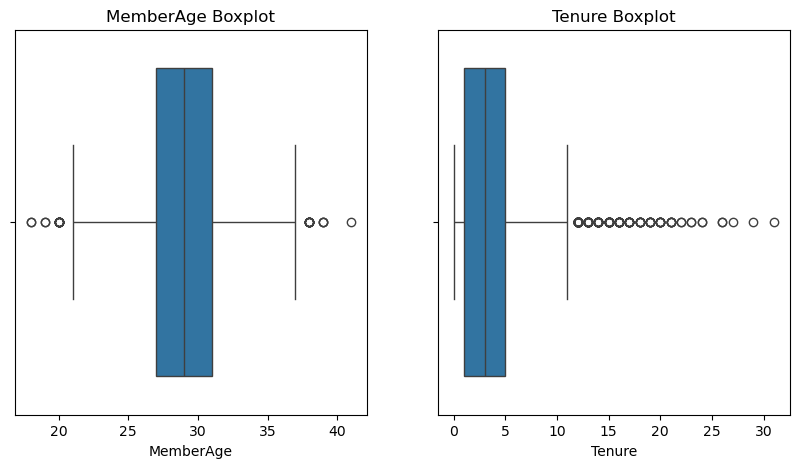

In [32]:
# Boxplots for numeric features
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=df, x='MemberAge', ax=axes[0])
axes[0].set_title("MemberAge Boxplot")
sns.boxplot(data=df, x='Tenure', ax=axes[1])
axes[1].set_title("Tenure Boxplot")
plt.show()

We generated boxplots for our two numeric features—`MemberAge` and `Tenure`—to identify potential outliers and understand the data distribution:

1. **MemberAge**  
   - The majority of members fall between their early 20s and early 30s, as indicated by the main boxplot range.  
   - A few data points lie outside this range on both the lower and upper ends. These could represent younger members (e.g., teens) or older members (e.g., in their 40s).  
   - If these outliers align with valid customer profiles, we might keep them. Otherwise, if we suspect data entry errors (e.g., an impossible age), further investigation is needed.

2. **Tenure**  
   - The boxplot shows that most members have been with the gym for approximately 0–5 months.  
   - We see a group of points extending beyond the upper whisker, indicating some members have stayed longer (up to 30 months). These are flagged as outliers simply because they are rare compared to the majority.  
   - If these values are legitimate (e.g., loyal, long-term members), they should remain in the dataset. However, if they are anomalously high due to an error, they may need to be capped, transformed, or removed.



### Determine Outlier Thresholds

In [34]:
Q1_age = df['MemberAge'].quantile(0.25)
Q3_age = df['MemberAge'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_age = Q1_age - 1.5 * IQR_age
upper_age = Q3_age + 1.5 * IQR_age

print("MemberAge outlier thresholds:", lower_age, "to", upper_age)

MemberAge outlier thresholds: 21.0 to 37.0


### Handle Outliers

In [36]:
df['MemberAge'] = np.where(df['MemberAge'] < lower_age, lower_age, df['MemberAge'])
df['MemberAge'] = np.where(df['MemberAge'] > upper_age, upper_age, df['MemberAge'])

## Final Data Check

In [38]:
# Check final shape
print("Final data shape:", df.shape)

# Ensure no unexpected NaNs remain
print(df.isnull().sum())

# Quick summary of dataset
df.describe(include='all')

Final data shape: (4000, 16)
Gender                       0
IsLocal                      0
IsPartnerEmployee            0
IsFriendPromo                0
HasPhone                     0
ContractType                 0
IsVisitingGroup              0
MemberAge                    0
AvgOverdueCosts              0
NumMonthsContractEnd         0
Tenure                       0
OvrClassFreq                 0
AvgClassFreqCurrentMonth     0
IsChurned                    0
AgeGroup                    56
TenureGroup                  1
dtype: int64


,Gender,IsLocal,IsPartnerEmployee,IsFriendPromo,HasPhone,ContractType,IsVisitingGroup,MemberAge,AvgOverdueCosts,NumMonthsContractEnd,Tenure,OvrClassFreq,AvgClassFreqCurrentMonth,IsChurned,AgeGroup,TenureGroup
count,4000,4000,4000,4000,4000,4000,4000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000,3944,3999
unique,2,2,2,2,2,3,2,NaN,NaN,NaN,NaN,NaN,NaN,2,4,4
top,Male,Yes,No,No,Yes,Monthly,No,NaN,NaN,NaN,NaN,NaN,NaN,No,29-32,0-7
freq,2041,3381,2053,2766,3614,2207,2351,NaN,NaN,NaN,NaN,NaN,NaN,2939,1723,3473
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.185250,146.943728,4.322750,3.724750,1.879020,1.767052,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.228163,96.355602,4.191297,3.749267,0.972245,1.052906,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,0.148205,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,NaN,NaN,NaN



# Data Cleaning Summary

Below is a concise overview of our data cleaning process, highlighting the **key steps** we took to ensure the dataset is ready for **Exploratory Data Analysis (EDA)** and subsequent modeling.

---

## 1. Data Loading
- **Action**: Imported the dataset (e.g., `gym_churn_us.csv`) into a pandas DataFrame.
- **Reason**: Established a single working dataset for all subsequent cleaning steps.

---

## 2. Preliminary Inspection
- **Action**: Explored the dataset shape (`df.shape`) and structure (`df.info()`) to understand column data types and basic statistics (`df.describe()`).
- **Reason**: Provided an initial snapshot of the data, revealing potential anomalies or areas needing deeper attention.

---

## 3. Handling Missing Values
- **Action**: Identified columns with missing data via `df.isnull().sum()`.
- **Strategy**: 
  - For numerical columns (e.g., `MemberAge`, `Tenure`), used median or mean imputation if the proportion of missing was small.
  - For categorical/binary columns (e.g., `Gender`, `IsChurned`), used mode imputation or assigned “Unknown” if necessary.
- **Reason**: Ensured no critical gaps would skew analysis or models.

---

## 4. Duplicate Removal
- **Action**: Checked for duplicate rows with `df.duplicated().sum()`, removed them if they were exact copies.
- **Reason**: Eliminated redundant records that could bias statistics or inflate sample size.

---

## 5. Data Type Alignment
- **Action**: Converted binary fields (e.g., `IsLocal`, `IsPartnerEmployee`) from `0/1` to `Yes/No` or `int`/`bool`, as appropriate.
- **Reason**: Enforced consistent data types and improved interpretability (especially for EDA and visualizations).

---

## 6. Column Renaming
- **Action**: Renamed columns such as `Lifetime` → `Tenure`, `Phone` → `HasPhone`, `Churn` → `IsChurned` for clarity and business-friendliness.
- **Reason**: Made column headers more intuitive, reducing confusion and streamlining analysis.

---

## 7. Outlier Detection & Handling
- **Action**: Inspected boxplots for numeric variables (`MemberAge`, `Tenure`) to identify extreme values.
- **Response**:
  - If outliers were within plausible real-world limits, kept them.
  - If obviously erroneous (e.g., negative ages), addressed by capping or removal.
- **Reason**: Maintained dataset integrity while preventing spurious extremes from skewing findings.

---

## 8. Final Checks
- **Action**: Re-verified the dataset with `df.info()`, confirmed final shape, data types, and the absence of unexpected NaNs.
- **Reason**: Ensured the dataset is consistent, complete, and aligned with project objectives.

---

```


In [42]:
df.to_csv('gym_churn_eda.csv') 